In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import math

#### Random Time Series

In [2]:
date_rng = pd.date_range(start='1/1/2018', end='1/08/2018', freq='H')

In [3]:
type(date_rng)

pandas.core.indexes.datetimes.DatetimeIndex

In [4]:
df = pd.DataFrame(date_rng, columns=['date'])
df['data'] = np.random.randint(0,100,size=(len(date_rng)))

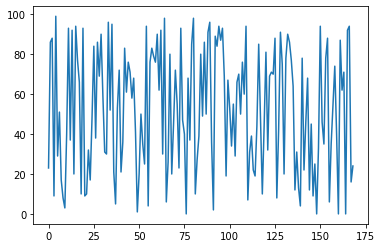

In [6]:
plt.plot(df['data'])

#### Generating Random Sin Wave + Noise

In [81]:
mu = 0
#change this to add more of a disturbance
sigma = 0.25

In [82]:
x = np.arange(0, 10,.1)
y = np.sin(x)
errors = np.random.normal(mu, sigma, 100)
y = y + errors

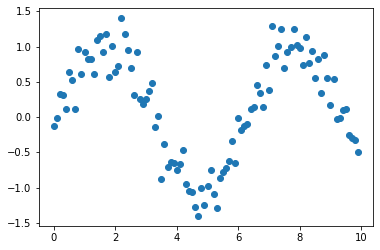

In [87]:
plt.scatter(x,y)

fitted model: <pykalman.standard.KalmanFilter object at 0x7feaa8313e80>


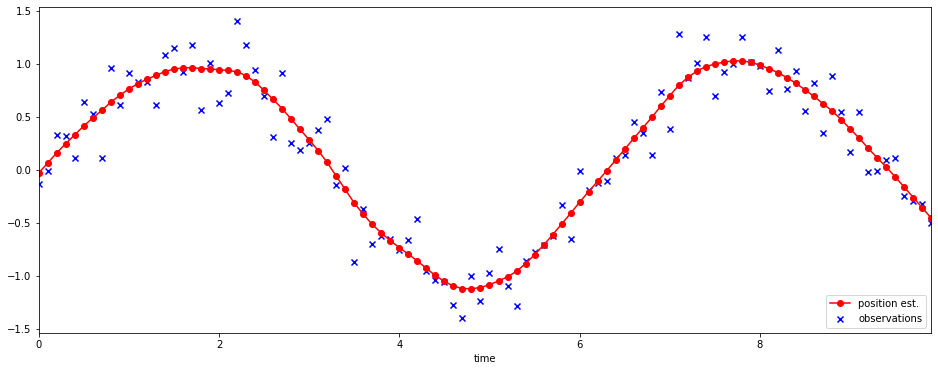

In [100]:
kf_test = KalmanFilter(transition_matrices=np.array([[1, 1], [0, 1]]),
                  transition_covariance=0.001 * np.eye(2))

# You can use the Kalman Filter immediately without fitting, but its estimates
# may not be as good as if you fit first.

# here we assume gauss-linear parameters and then estimate with the KalmanFilter.em() function based on reasonable
# initial estimates
states_pred_test = kf_test.em(y).smooth(y)[0]
print('fitted model: {0}'.format(kf_test))

# Plot lines for the observations without noise, the estimated position of the
# target before fitting, and the estimated position after fitting.
pl.figure(figsize=(16, 6))
obs_scatter = pl.scatter(x, y, marker='x', color='b',
                         label='observations')
position_line = pl.plot(x, states_pred_test[:, 0],
                        linestyle='-', marker='o', color='r',
                        label='position est.')
'''
position_line = pl.plot(x, states_pred_test[:, 1],
                        linestyle='-', marker='o', color='g',
                        label='velocity est.')
'''
pl.legend(loc='lower right')
pl.xlim(xmin=0, xmax=x.max())
pl.xlabel('time')
pl.show()


### With Python Library

Source: https://github.com/pykalman/pykalman/blob/master/examples/standard/plot_sin.py

fitted model: <pykalman.standard.KalmanFilter object at 0x7feaa7a3ce50>


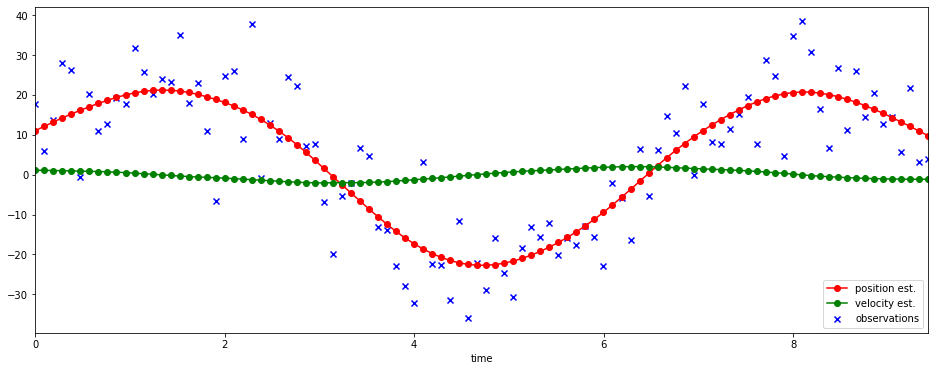

In [58]:
import pylab as pl

from pykalman import KalmanFilter

rnd = np.random.RandomState(0)

# generate a noisy sine wave to act as our fake observations
n_timesteps = 100
x = np.linspace(0, 3 * np.pi, n_timesteps)
observations = 20 * (np.sin(x) + 0.5 * rnd.randn(n_timesteps))

# create a Kalman Filter by hinting at the size of the state and observation
# space.  If you already have good guesses for the initial parameters, put them
# in here.  The Kalman Filter will try to learn the values of all variables.
kf = KalmanFilter(transition_matrices=np.array([[1, 1], [0, 1]]),
                  transition_covariance=0.01 * np.eye(2))

# You can use the Kalman Filter immediately without fitting, but its estimates
# may not be as good as if you fit first.
states_pred = kf.em(observations).smooth(observations)[0]
print('fitted model: {0}'.format(kf))

# Plot lines for the observations without noise, the estimated position of the
# target before fitting, and the estimated position after fitting.
pl.figure(figsize=(16, 6))
obs_scatter = pl.scatter(x, observations, marker='x', color='b',
                         label='observations')
position_line = pl.plot(x, states_pred[:, 0],
                        linestyle='-', marker='o', color='r',
                        label='position est.')
velocity_line = pl.plot(x, states_pred[:, 1],
                        linestyle='-', marker='o', color='g',
                        label='velocity est.')
pl.legend(loc='lower right')
pl.xlim(xmin=0, xmax=x.max())
pl.xlabel('time')
pl.show()


In [67]:
kf

/Users/isabellafaccone/opt/anaconda3/lib/python3.8/site-packages/pykalman/standard.py:1124: RuntimeWarning: covariance is not positive-semidefinite.
  + rng.multivariate_normal(


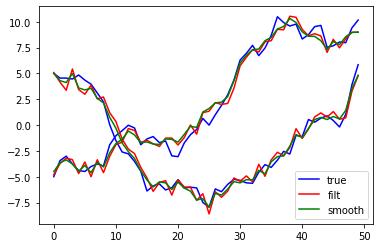

In [99]:

'''
===========================================
Using the Kalman Filter and Kalman Smoother
===========================================
This simple example shows how one may apply the Kalman Filter and Kalman
Smoother to some randomly generated data.
The Kalman Filter and Kalman Smoother are two algorithms for predicting the
hidden state of Linear-Gaussian system. In this script, all model parameters
are specified beforehand, so there is no need to fit the Kalman Filter's
parameters to the measurements. However, this is not essential; sensible
defaults will be used for unspecified parameters, and they may be learned using
:func:`KalmanFilter.em`.
The figure drawn shows the true, hidden state, the state estimates given by the
Kalman Filter, and the state estimates given by the Kalman Smoother.
'''
import numpy as np
import pylab as pl
from pykalman import KalmanFilter

# specify parameters
random_state = np.random.RandomState(0)
transition_matrix = [[1, 0.1], [0, 1]]
transition_offset = [-0.1, 0.1]
observation_matrix = np.eye(2) + random_state.randn(2, 2) * 0.1
observation_offset = [1.0, -1.0]
transition_covariance = np.eye(2)
observation_covariance = np.eye(2) + random_state.randn(2, 2) * 0.1
initial_state_mean = [5, -5]
initial_state_covariance = [[1, 0.1], [-0.1, 1]]

# sample from model
kf = KalmanFilter(
    transition_matrix, observation_matrix, transition_covariance,
    observation_covariance, transition_offset, observation_offset,
    initial_state_mean, initial_state_covariance,
    random_state=random_state
)
states, observations = kf.sample(
    n_timesteps=50,
    initial_state=initial_state_mean
)

# estimate state with filtering and smoothing
filtered_state_estimates = kf.filter(observations)[0]
smoothed_state_estimates = kf.smooth(observations)[0]

# draw estimates
pl.figure()
lines_true = pl.plot(states, color='b')
lines_filt = pl.plot(filtered_state_estimates, color='r')
lines_smooth = pl.plot(smoothed_state_estimates, color='g')
pl.legend((lines_true[0], lines_filt[0], lines_smooth[0]),
          ('true', 'filt', 'smooth'),
          loc='lower right'
)
pl.show()


#### Questions/Observations

1. Seems to make sense how to estimate the parameters from the observations but the KM filter observation, filtring an smoothing sounds more like a convex optimization problem (MLE) than it does a KM added information problem?
2. So, how do you add the outside information in, through transition matricies. Is it the case that you would then set the transition matricies rather than utilize an observation --> estimation process? Perhaps through the backtesting data we could set up a system that takes all of the different feeding data and create a ML model that optimizes the parameter estimation via MLE and then sets the KM parameters.

#### Importing Real Data

In [102]:
rawData = pd.read_csv('annotation_dataset.csv')

In [103]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33705 entries, 0 to 33704
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   captured_at          33705 non-null  object 
 1   service_id           33705 non-null  int64  
 2   pen_id               33705 non-null  int64  
 3   annotation_state_id  33705 non-null  int64  
 4   base_key             33705 non-null  object 
 5   url_key              33705 non-null  object 
 6   right_crop_url       33705 non-null  object 
 7   left_crop_metadata   33705 non-null  object 
 8   right_crop_metadata  33705 non-null  object 
 9   camera_metadata      33705 non-null  object 
 10  annotation           33705 non-null  object 
 11  captured_at.1        33705 non-null  object 
 12  ts_source_start      33705 non-null  object 
 13  ts_source_end        0 non-null      float64
 14  ts                   33705 non-null  object 
 15  annotator_email      33705 non-null 

In [105]:
rawData.shape

(33705, 29)

In [106]:
rawData.head()

,captured_at,service_id,pen_id,annotation_state_id,base_key,url_key,right_crop_url,left_crop_metadata,right_crop_metadata,camera_metadata,...,filter_reasons,id,state,description,left_crop_url.1,estimated_weight_g,estimated_k_factor,estimated_length_mm,akpd_score,hour
0,2020-08-10 09:25:57.500734+00:00,2,60,3,environment=production/site-id=39/pen-id=60/da...,https://aquabyte-crops.s3.eu-west-1.amazonaws....,https://aquabyte-crops.s3.eu-west-1.amazonaws....,"{'width': 2964, 'height': 1172, 'x_coord': 104...","{'width': 2935, 'height': 1199, 'x_coord': 686...","{'baseline': 0.10508915602609592, 'focalLength...",...,NaN,3,QA,Submitted to QA,https://aquabyte-crops.s3.eu-west-1.amazonaws....,4004.462957,1.252559,683.778343,0.997028,9
1,2020-08-10 09:26:02.458686+00:00,2,60,3,environment=production/site-id=39/pen-id=60/da...,https://aquabyte-crops.s3.eu-west-1.amazonaws....,https://aquabyte-crops.s3.eu-west-1.amazonaws....,"{'width': 3275, 'height': 1321, 'x_coord': 820...","{'width': 3463, 'height': 1309, 'x_coord': 454...","{'baseline': 0.10508915602609592, 'focalLength...",...,NaN,3,QA,Submitted to QA,https://aquabyte-crops.s3.eu-west-1.amazonaws....,3965.743780,1.294930,674.051090,0.996861,9
2,2020-08-10 09:29:46.476067+00:00,2,60,3,environment=production/site-id=39/pen-id=60/da...,https://aquabyte-crops.s3.eu-west-1.amazonaws....,https://aquabyte-crops.s3.eu-west-1.amazonaws....,"{'width': 2966, 'height': 1244, 'x_coord': 101...","{'width': 3439, 'height': 1274, 'x_coord': 454...","{'baseline': 0.10508915602609592, 'focalLength...",...,NaN,3,QA,Submitted to QA,https://aquabyte-crops.s3.eu-west-1.amazonaws....,3918.023705,1.309738,668.796850,0.996467,9
3,2020-08-10 09:40:37.489458+00:00,2,60,3,environment=production/site-id=39/pen-id=60/da...,https://aquabyte-crops.s3.eu-west-1.amazonaws....,https://aquabyte-crops.s3.eu-west-1.amazonaws....,"{'width': 3702, 'height': 1472, 'x_coord': 210...","{'width': 3468, 'height': 1397, 'x_coord': 0, ...","{'baseline': 0.10508915602609592, 'focalLength...",...,NaN,3,QA,Submitted to QA,https://aquabyte-crops.s3.eu-west-1.amazonaws....,3830.917180,1.193554,684.678748,0.996522,9
4,2020-08-10 09:41:16.475366+00:00,2,60,3,environment=production/site-id=39/pen-id=60/da...,https://aquabyte-crops.s3.eu-west-1.amazonaws....,https://aquabyte-crops.s3.eu-west-1.amazonaws....,"{'width': 2918, 'height': 1191, 'x_coord': 673...","{'width': 2790, 'height': 1118, 'x_coord': 332...","{'baseline': 0.10508915602609592, 'focalLength...",...,NaN,3,QA,Submitted to QA,https://aquabyte-crops.s3.eu-west-1.amazonaws....,2216.288596,1.207688,568.273201,0.998286,9


In [114]:
# eliminates around 2,000 datapoints
highConf = rawData[rawData['akpd_score']>0.9]

In [115]:
highConf.shape

(31273, 29)

In [ ]:
# have the hours so could filter for feeding times during the daylight?

In [117]:
# no reasons to filter at this point (just nan but might be useful for other data sets?)
rawData['filter_reasons'].unique()

array([nan])

In [ ]:
## 20 days of data and take all of the raw average numbers 
# and apply the trend filtering to it

In [109]:
rawWeights = rawData[['estimated_weight_g', 'captured_at']]

In [110]:
rawWeights.head()

,estimated_weight_g,captured_at
0,4004.462957,2020-08-10 09:25:57.500734+00:00
1,3965.743780,2020-08-10 09:26:02.458686+00:00
2,3918.023705,2020-08-10 09:29:46.476067+00:00
3,3830.917180,2020-08-10 09:40:37.489458+00:00
4,2216.288596,2020-08-10 09:41:16.475366+00:00
